<a href="https://colab.research.google.com/github/kithian/inteligencia_artificial/blob/main/Evaluacion_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación 2

**Integrantes:**

+ Integrante 1: Christian Retamal : christian.retamal2201@alumnos.ubiobio.cl
+ Integrante 2: José Hormazabal : jose.hormazabal2201@alumnos.ubiobio.cl
+ Integrante 3: David Parraguez : david.parraguez2201@alumnos.ubiobio.cl

**Fecha de Entrega:** 16-10-2025  


---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 de la asignatura de Inteligencia Artificial de la carrera Ingeniería Civil en Informática de la Universidad del Biío Bío - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

-
-
-

Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de numpy usas:

```python
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
````

In [27]:

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Actividades

▶ Definir objetivo del proyecto de modelo de regresión (incluye la elección de la variable objetivo) -	**0,50 puntos**

▶ Justificar, para el negocio, la utilidad del proyecto	- **0,40 puntos**

▶ Análisis de datos (duplicados, consistencia, nulos, atípicos), debe incluir los hallazgos	- **0,30 puntos**

▶ Análisis de la distribución de variable objetivo, debe incluir los hallazgos	- **0,40 puntos**

▶ Ejecución, correcta, de fase de preparación de datos (incluye transformación y limpieza) - **0,20 puntos**

▶ Descripción de lo realizado en la fase de preparación de datos - **0,50 puntos**

▶ Creación de modelo predictivo usando **TODAS** las variables disponibles ( línea base)	- **0,10 puntos**

▶ Evaluación del modelo predictivo de la línea base construido	- **0,10 puntos**

▶ Interpretación en el negocio de R2 - **0,40 puntos**

▶ Interpretación en el negocio de MAE - **0,40 puntos**

▶ Interpretación en el negocio de MSLE - **0,40 puntos**

▶ Selección de subconjunto de variables predictoras (debe incluir el fundamento con base cientifica de la selección) -	**0,20 puntos**

▶ Creación de modelo predictivo usando el subconjunto de variables seleccionadas en el punto anterior -	**0,10 puntos**

▶ Evaluación de la variante de modelo predictivo construido -	**0,10 puntos**

▶ Realizar predicción con modelo base -	**0,30 puntos**

▶ Realizar predicción con variante del modelo base -	**0,30 puntos**

▶ Comparativa de los resultados de los modelos de línea base y variante	- **0,50 puntos**

▶ Obtener dos conclusiones respecto de la comparativa del modelo base y el variante	- **0,50 puntos**

▶ Recomendación de modelo: elección del modelo que recomendaría para ser puesto en producción -	**0,30 puntos**

---
## Cálculo de calificación (grupal) - 40% de la calificación final

$Calificación_{proyecto} = 1 + \sum^{19}_i{item_i}$


$Calificación_{grupal} = Calificación_{proyecto}*(1-\sum^{4}_i{penalización_i})$

---


## Cálculo de calificación individual - 60% de la calificación final

✅ Responde a la pregunta de forma correcta - **7,0**

🟡 Responde a la pregunta de forma medianamante correcta - **4,0**

🔴 Responde a la pregunta de forma incorrecta o no responde - **2,0**

---


## Cálculo de final

$Calificacion_{final} = Calificacion_{grupal}*0,4 + Calificacion_{individual}*0,4$

---


## Penalizaciones
+ Ausencia de datos de autores - 10% de la calificación final
+ Falta de aplicación de buenas prácticas - 10% de la calificación final
+ Faltas en redacción y ortografía - 10% de la calificación final
+ Ausencia de uso de pipeline - 30% de la calificación final
+ Ausencia de separación de datos en entrenamiento y test - 40% de la calificación final

---

In [2]:
# Descargar el archivo y guardarlo en el entorno
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/master/data/taxi_data.csv

--2025-10-16 12:34:37--  https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/master/data/taxi_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67269 (66K) [text/plain]
Saving to: ‘taxi_data.csv’

taxi_data.csv       100%[===================>]  65.69K  --.-KB/s    in 0.01s   

2025-10-16 12:34:38 (5.02 MB/s) - ‘taxi_data.csv’ saved [67269/67269]



# Objetivo del Modelo

El objetivo es predecir el costo esperado de un viaje urbano en función de la distancia, duración, hora del día, día de la semana, tipo de vehículo y condiciones climáticas.

La variable continua escogida es el costo de viaje ya que depende de variables ya disponibles y que son medibles (distancia, tiempo, hora, tipo de vehículo). Además, se menciona un problema de tarigas inconsistentes, lo que podría encajar perfectamente con este modelo.




# Utilidad

Para la empresa CityMove, predecir el costo esperado del viaje tendrá un impacto operativo inmediato:


1.   Mejora la consistencia de tarifas
2.   Permite optimizar precios dinámicos según demanda y condiciones
3.   Ayuda a planificar rutas y tiempos de traslado con mejor precisión
4.   Aumenta la satisfacción del cliente al haber precios más justos y previsibles

# Análisis de Datos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("taxi_data.csv")
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [4]:
# Duplicados

duplicados = data[data.duplicated(keep=False)]
duplicados

def obtiene_duplicados(repetidos : pd.DataFrame, indice : int, columnas : np.array) -> pd.DataFrame:
  fila_seleccionada = repetidos.loc[indice]
  mascara = (repetidos == fila_seleccionada).all(axis=1)
  duplicados_fila = repetidos[mascara]
  return pd.DataFrame(duplicados_fila)

# Comprobando si hay duplicados
if len(duplicados) == 0:
    print("No hay filas duplicadas en el dataset.")
else:
    muestra = obtiene_duplicados(duplicados, 0, [])
    display(muestra)

No hay filas duplicadas en el dataset.




---

Comentarios

---

No hay existencia de filas duplicadas en el dataset dado.


In [5]:
# Consistencia

# Variables categóricas y numéricas
columnas_categoricas = ['Day_of_Week', 'Traffic_Conditions', 'Weather']
columnas_numericas = ['Trip_Distance_km', 'Time_of_Day', 'Passenger_Count',
                  'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate',
                  'Trip_Duration_Minutes', 'Trip_Price']

# Convertir a numérico para poder comparar
for col in columnas_numericas:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 1. Revisar valores negativos o cero donde no deberían

for col in columnas_numericas:
    if col in ['Time_of_Day', 'Passenger_Count']:
        mask = data[col] < 0
    else:
        mask = data[col] <= 0
    count = mask.sum()
    if count > 0:
        print(f"{col}: {count} valores inconsistentes")

# 2. Revisar rangos de variables horarias y días
tiempo_invalido = data[(data['Time_of_Day'] < 0) | (data['Time_of_Day'] > 23)]
print(len(tiempo_invalido))

# Convertir Day_of_Week a numérico
data['Day_of_Week'] = pd.to_numeric(data['Day_of_Week'], errors='coerce')
dias_invalido = data[(data['Day_of_Week'] < 0) | (data['Day_of_Week'] > 6)]
print(len(dias_invalido))

# 3. Revisar categorías válidas
print("Traffic_Conditions:", data['Traffic_Conditions'].unique())
print("Weather:", data['Weather'].unique())

# 4. Revisar relaciones básic
mask = (data['Trip_Distance_km'] == 0) & (data['Trip_Duration_Minutes'] > 5)
print(mask.sum())

# Precio vs tarifas base y variables por km/min
expected_price = data['Base_Fare'] + data['Per_Km_Rate']*data['Trip_Distance_km'] + data['Per_Minute_Rate']*data['Trip_Duration_Minutes']
mask = abs(data['Trip_Price'] - expected_price) > 5  # tolerancia de 5 unidades monetarias
print(mask.sum())


0
0
Traffic_Conditions: ['Low' 'High' 'Medium' nan]
Weather: ['Clear' nan 'Rain' 'Snow']
0
16




---

Comentarios

---

El dataset está bastante limpio en cuanto a valores numéricos y relaciones básicas, pero hay algunos valores nulos o inconsistentes en categorías y precios, que deberían corregirse o imputarse antes de construir un modelo de regresión confiable.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            0 non-null      float64
 2   Day_of_Week            0 non-null      float64
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(9), object(2)
memory usage: 86.1+ KB


                       Cantidad Nulos  Porcentaje Nulos (%)
Trip_Distance_km                   50                   5.0
Time_of_Day                      1000      

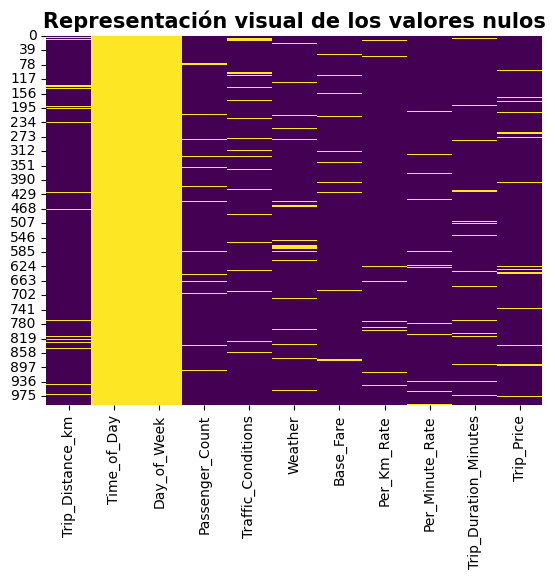

In [8]:
# Nulos
data.info()

# Determinando porcentaje de nulos
columnas_con_nulos = data.isna().sum()[data.isna().sum() > 0]
porcentaje_nulos = (columnas_con_nulos / data.shape[0]) * 100

resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

print("\n")
print(resultado)

# Visualizar nulos
print("\n")
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Representación visual de los valores nulos", fontsize=15, fontweight="bold")
plt.show()



---
Comentarios

---

Existen datos nulos con un porcentaje poco significativo, pero se tratarán en la fase siguiente.



In [9]:
# Atipicos

def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
  # Calcular los límites
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  # Calcula rango intercuartilico
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrar outliers
  return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : np.array) -> dict:
  total_atipicos = {}
  for columna in data[columnas]:
    atipicos = buscar_atipicos(data, columna)
    total_atipicos[columna] = atipicos.shape[0]
  return total_atipicos

atipicos_por_columna = obtener_cantidad_atipicos(data, data.describe().columns)
pd.DataFrame.from_dict(atipicos_por_columna, orient='index', columns=['Cantidad de atípicos'])

,Cantidad de atípicos
Trip_Distance_km,20
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0
Trip_Price,26




---
Comentarios

---

La presencia de valores atípicos en variables clave como Trip_Distance y Trip_Price sugiere que existen viajes que se comportan de manera diferente al patrón general del dataset.

Será necesario evaluar si estos valores representan casos reales válidos o errores o inconsistencias en los datos. En caso de lo segundo, se optará por tratarlos.


# Distribución de la variable objetivo

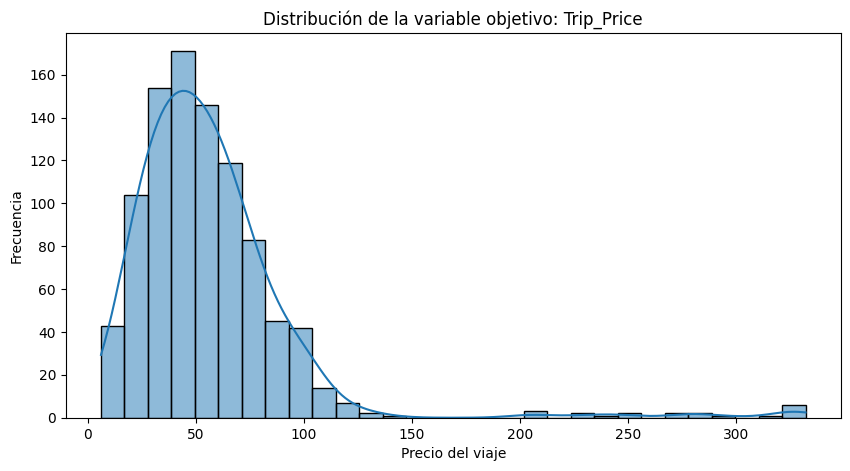

,Trip_Price
count,951.000000
mean,56.874773
std,40.469791
min,6.126900
25%,33.742650
50%,50.074500
75%,69.099350
max,332.043689


In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data['Trip_Price'], bins=30, kde=True)
plt.title("Distribución de la variable objetivo: Trip_Price")
plt.xlabel("Precio del viaje")
plt.ylabel("Frecuencia")
plt.show()

data['Trip_Price'].describe()



---

Comentarios

---

La variable Trip_Price muestra una distribución asimétrica hacia la derecha, con la mayoría de los viajes concentrados en precios bajos y pocos casos con valores muy altos. Esto indica la presencia de viajes excepcionales o atípicos con costos significativamente mayores.

# Preparación de los datos

No se observan duplicados en el dataset, pero por precaución, se podrían eliminar:


In [11]:
data = data.drop_duplicates()
data.shape

(1000, 11)



---

Valores nulos

---

Para las variables cuantitativas, podemos hacer dos cosas:


*   Reemplazar por el promedio (si no hay atipicos)
*   Reemplazar por la mediana (si hay atipicos)

En el caso de las variables cualitativas, los nulos se deben reemplazar por el valor con mayor frecuencia.

In [12]:
# Separar columnas numéricas y categóricas
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

# Imputar numéricas con la mediana
for col in num_cols:
    mediana = data[col].median()
    data[col].fillna(mediana, inplace=True)

# Imputar categóricas con la moda
for col in cat_cols:
    moda = data[col].mode()[0]
    data[col].fillna(moda, inplace=True)

# Verificación final
data.isnull().sum()


/tmp/ipython-input-1708944569.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mediana, inplace=True)
/tmp/ipython-input-1708944569.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,0
Trip_Distance_km,0
Time_of_Day,1000
Day_of_Week,1000
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0




---

Descripción proceso

---

1. Verificación y eliminación de duplicados



*   Se revisó la existencia de filas duplicadas con data.duplicated().
*   No se encontraron registros duplicados, pero se aplicó data.drop_duplicates() por precaución, asegurando que cada viaje sea único.
*   Esto garantiza que el modelo no aprenda información repetida que podría sesgar la predicción.

2. Tratamiento de valores nulos



*   Las columnas numéricas con valores nulos se imputaron con la mediana, ya que la variable objetivo (Trip_Price) y algunas variables predictoras presentan outliers que podrían sesgar el promedio.
*  Las columnas categóricas con nulos se imputaron con la moda, reemplazando los valores faltantes por la categoría más frecuente.
*   Tras la imputación, data.isnull().sum() mostró todos los valores en cero, confirmando que no quedan datos faltantes.

Resultados:

El dataset final está limpio, consistente y sin duplicados ni valores nulos, listo para realizar análisis exploratorio, evaluar la distribución de la variable objetivo y entrenar modelos de regresión.










# Creación del modelo predictivo usando todas las variables

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [14]:
data = pd.read_csv('taxi_data.csv')
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


Comprensión de los datos


In [19]:
# Calcula la matriz de correlaciones
correlaciones = data.corr(numeric_only=True)

# Ver correlación con la variable objetivo
correlacion_objetivo = correlaciones["Trip_Price"].sort_values(ascending=False)

correlacion_objetivo

,Trip_Price
Trip_Price,1.000000
Trip_Distance_km,0.849123
Per_Km_Rate,0.275135
Trip_Duration_Minutes,0.221211
Per_Minute_Rate,0.141226
Base_Fare,0.035533
Passenger_Count,-0.014223


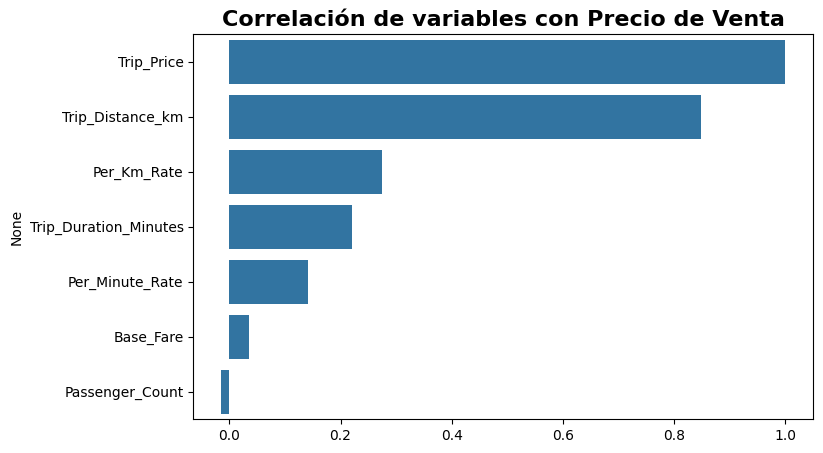

In [20]:
# Visualización de las correlaciones con el objetivo
plt.figure(figsize=(8,5))
sb.barplot(x=correlacion_objetivo.values, y=correlacion_objetivo.index)
plt.title("Correlación de variables con Precio de Venta",
          fontsize=16, fontweight="bold")
plt.show()

In [38]:
# Crea el pipeline final (preprocesamiento + modelo)
modelo = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Entrenamiento
modelo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Trip_Distance_km',
                                                   'Passenger_Count',
                                                   'Base_Fare', 'Per_Km_Rate',
                                                   'Per_Minute_Rate',
                                                   'Trip_Duration_Minutes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Time_of_Day', 'Day_of_Week',
                                                   'Traffic_Conditions',
                                                   'Weather'])])),
                ('regressor', LinearRegression())])

In [31]:
# Variables con las cuales fue entrenado el modelo
modelo.feature_names_in_

array(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week',
       'Passenger_Count', 'Traffic_Conditions', 'Weather', 'Base_Fare',
       'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes'],
      dtype=object)

Visualizar el estado de la transformación

In [30]:
# Tomar solo el preprocesamiento (sin el modelo)
X_transformed = modelo.named_steps["preprocessor"].transform(X)

# Convertir a DataFrame para verlo con nombres de columnas
feature_names = modelo.named_steps["preprocessor"].get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed_df.head()

,num__Trip_Distance_km,num__Passenger_Count,num__Base_Fare,num__Per_Km_Rate,num__Per_Minute_Rate,num__Trip_Duration_Minutes,cat__Time_of_Day_Afternoon,cat__Time_of_Day_Evening,cat__Time_of_Day_Morning,cat__Time_of_Day_Night,cat__Day_of_Week_Weekday,cat__Day_of_Week_Weekend,cat__Traffic_Conditions_High,cat__Traffic_Conditions_Low,cat__Traffic_Conditions_Medium,cat__Weather_Clear,cat__Weather_Rain,cat__Weather_Snow
0,19.35,3.0,3.56,0.80,0.32,53.82,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,36.87,1.0,2.70,1.21,0.15,37.27,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
2,30.33,4.0,3.48,0.51,0.15,116.81,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,25.87,3.0,2.93,0.63,0.32,22.64,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,8.64,2.0,2.55,1.71,0.48,89.33,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [32]:
pd.DataFrame(X).isnull().sum()

,0
Trip_Distance_km,50
Time_of_Day,49
Day_of_Week,46
Passenger_Count,48
Traffic_Conditions,50
Weather,46
Base_Fare,44
Per_Km_Rate,44
Per_Minute_Rate,49
Trip_Duration_Minutes,46


In [33]:
X_transformed_df.isnull().sum()

,0
num__Trip_Distance_km,0
num__Passenger_Count,0
num__Base_Fare,0
num__Per_Km_Rate,0
num__Per_Minute_Rate,0
num__Trip_Duration_Minutes,0
cat__Time_of_Day_Afternoon,0
cat__Time_of_Day_Evening,0
cat__Time_of_Day_Morning,0
cat__Time_of_Day_Night,0


Se verifico que en el tratamiento de nulos en la data_base se hizo de manera correcta, ya que no se aprecian que hayan nulos.

# Etapa de evaluación del modelo predictivo

In [34]:
# Funciones para ayudar con la interpretación de las métricas
def interpretacion(algoritmo : str, score : float, contexto : str, caracteristicas : np.array = None):
  """
  Genera la interpretación del rendimiento del modelo
  """
  if not caracteristicas == None:
    return f"""Modelo de regresión {algoritmo}
    {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando: {caracteristicas.values}."""
  else:
    return f"""Modelo de regresión {algoritmo}
      {score :.2%} de la variabilidad en {contexto} se puede explicar utilizando las variables independientes"""

def mae_interpretacion(value : float, contexto : str, modelo : str = "Modelo") -> str:
  """
  Genera la interpretación del MAE
  """
  return f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ± $ {value:.2f} del valor real."

def msle_interpretacion(value : float, contexto : str, modelo : str = "Modelo") -> str:
  """
  Genera la interpretación del MSLE
  """
  return f"El modelo '{modelo}' pudo predecir {contexto} en el conjunto de prueba con un error de ± {value: .2%} del valor real."

In [42]:
# Predicciones
y_pred = modelo.predict(X_test)
y_pred[y_pred < 0] = 0

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas del modelo ---")
print(f"{'RMSE' :<15}: {rmse:,.0f} USD")
print(f"{'R²' :<15}: {r2:.3f}")

print(f"{'MAE':<15}: {mae:,.0f} USD")
print(f"{'MSLE': <15}: {msle:.3f}")


--- Métricas del modelo ---
RMSE           : 13 USD
R²             : 0.898
MAE            : 10 USD
MSLE           : 0.278


Guardado de las metricas para poder compararlas después

In [43]:
resultado_inicial = {"RMSE" : rmse, "R2" : r2, "MAE" : mae, "MSLE" : msle}

In [57]:
nombre_modelo = "Predicción precio viaje en taxi"
print(interpretacion(nombre_modelo, r2, "Trip_Price"))

Modelo de regresión Predicción precio viaje en taxi
      89.77% de la variabilidad en Trip_Price se puede explicar utilizando las variables independientes


In [58]:
# Interpretación de las métricas
print(mae_interpretacion(mae, "Trip_Price", nombre_modelo))
print(msle_interpretacion(msle, "Trip_Price", nombre_modelo))

El modelo 'Predicción precio viaje en taxi' pudo predecir Trip_Price en el conjunto de prueba con un error de ± $ 9.88 del valor real.
El modelo 'Predicción precio viaje en taxi' pudo predecir Trip_Price en el conjunto de prueba con un error de ±  27.81% del valor real.


In [48]:
# Crear un nuevo DataFrame con los datos de un viaje de ejemplo
nuevo_viaje = pd.DataFrame({
    'Trip_Distance_km': [15.0],
    'Time_of_Day': ['Morning'],
    'Day_of_Week': ['Weekday'],
    'Passenger_Count': [2.0],
    'Traffic_Conditions': ['Medium'],
    'Weather': ['Clear'],
    'Base_Fare': [3.0],
    'Per_Km_Rate': [0.75],
    'Per_Minute_Rate': [0.30],
    'Trip_Duration_Minutes': [40.0]
})

# Obtener la predicción para el nuevo viaje
precio_estimado = modelo.predict(nuevo_viaje)[0]

print(f"\nPrecio estimado para el nuevo viaje: {precio_estimado:,.2f} USD")


Precio estimado para el nuevo viaje: 17.13 USD


Guardando las métricas para comprara

In [49]:
# Guarda las métricas para comparar con alguna variante
resultado_base = {"RMSE" : rmse, "R2" : r2, "MAE" : mae, "MSLE" : msle}

# Variantes del modelo

In [51]:
def mas_correlacionadas(correlacion_objetivo :pd.Series, k_mejor_positiva : int,
                        k_mejor_negativa : int) -> np.array:
  """
  Obtiene las k variables más correlacionadas (positiva y negativamente)
  con la variable objetivo, a partir de una serie de correlaciones
  ordenada de mayor a menor.
  """
  # Top k positivas (ignorando la propia variable objetivo
  positivas = correlacion_objetivo.index[1:k_mejor_positiva+1]

  # Top k negativas (últimos elementos de la serie)
  negativas = correlacion_objetivo.index[-k_mejor_negativa:]

  return np.array(list(positivas) + list(negativas))

In [52]:
# Obtiene las variables con mejor correlación (positiva y negativa) con la variable objetivo
mejores_predictoras = mas_correlacionadas(correlacion_objetivo, 2, 1)
mejores_predictoras

array(['Trip_Distance_km', 'Per_Km_Rate', 'Passenger_Count'], dtype='<U16')

In [56]:
# Variables
features_num = mejores_predictoras
features_cat = [] # En este caso NO existen variables categóricas
target = "Trip_Price"

X = data[features_num]
y = data[target]

# Preprocesamiento numérico: imputación con mediana
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

# Preprocesamiento categórico: imputación + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

# Combina en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, features_num),
        ("cat", categorical_transformer, features_cat)
    ]
)

In [59]:
# Crea el pipeline final (preprocesamiento + modelo)
nuevo_modelo = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# División train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

# Entrenamiento
nuevo_modelo.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['Trip_Distance_km', 'Per_Km_Rate', 'Passenger_Count'], dtype='<U16')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('regressor', LinearRegression())])

In [60]:
# Tomar solo el preprocesamiento (sin el modelo)
X_transformed = nuevo_modelo.named_steps["preprocessor"].transform(X)

# Convertir a DataFrame para verlo con nombres de columnas
feature_names = nuevo_modelo.named_steps["preprocessor"].get_feature_names_out()
X_transformed_df = pd.DataFrame(X_transformed, columns=feature_names)
X_transformed_df.head()

,num__Trip_Distance_km,num__Per_Km_Rate,num__Passenger_Count
0,19.35,0.80,3.0
1,36.87,1.21,1.0
2,30.33,0.51,4.0
3,25.29,0.63,3.0
4,8.64,1.71,2.0


In [61]:
"""tratamiento de nulos"""
X_transformed_df.isnull().sum()

,0
num__Trip_Distance_km,0
num__Per_Km_Rate,0
num__Passenger_Count,0


In [63]:
# Predicciones
y_pred = nuevo_modelo.predict(X_test)
y_pred[y_pred < 0] = 0

# Evaluación
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- Métricas del modelo ---")
print(f"{'RMSE' :<15}: {rmse:,.0f} USD")
print(f"{'R²' :<15}: {r2:.3f}")

print(f"{'MAE':<15}: {mae:,.0f} USD")
print(f"{'MSLE': <15}: {msle:.3f}")


--- Métricas del modelo ---
RMSE           : 18 USD
R²             : 0.801
MAE            : 14 USD
MSLE           : 0.256


In [64]:
resultado_variante = {"RMSE" : rmse, "R2" : r2, "MAE" : mae, "MSLE" : msle}
"""guardar métrica para comparar con el original"""

'guardar métrica para comparar con el original'

In [65]:
# Crear un nuevo DataFrame con los datos de un viaje de ejemplo, usando las variables del nuevo_modelo
nuevo_viaje_variante = pd.DataFrame({
    'Trip_Distance_km': [20.0],
    'Per_Km_Rate': [0.90],
    'Passenger_Count': [1.0]
})

# Obtener la predicción para el nuevo viaje usando el nuevo_modelo
precio_estimado_variante = nuevo_modelo.predict(nuevo_viaje_variante)[0]

print(f"\nPrecio estimado para el nuevo viaje (variante del modelo): {precio_estimado_variante:,.2f} USD")


Precio estimado para el nuevo viaje (variante del modelo): 35.58 USD


Las variables elegidas son "Trip_Distance_km" , "Per_Km_Rate"  y "Passenger_Count", porque son las que mas correlacion tienen segun el gráfico de correlación, con respecto a la variable objetivo "Trip_Price".

In [68]:
# Crea DataFrame con los resultados de las métricas
data_resultados = pd.DataFrame({
    "Métrica": list(resultado_base.keys()),
    "Modelo Original": list(resultado_base.values()),
    "Modelo Variante": list(resultado_variante.values())
})
display(data_resultados.round(3))

,Métrica,Modelo Original,Modelo Variante
0,RMSE,12.802,17.858
1,R2,0.898,0.801
2,MAE,9.879,14.130
3,MSLE,0.278,0.256


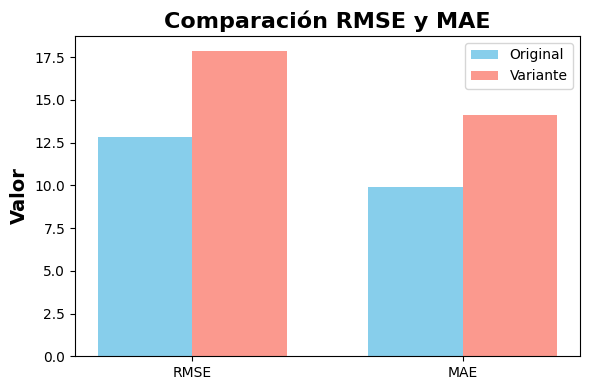

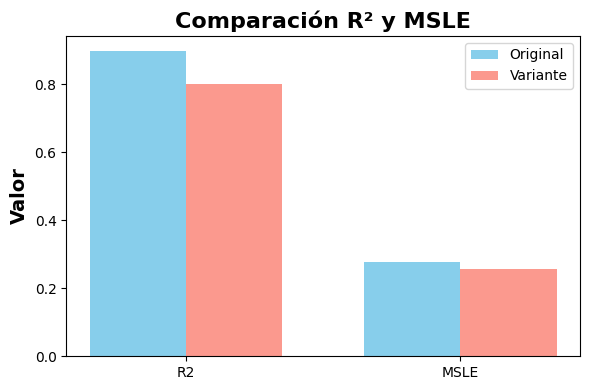

In [67]:
# Separa las métricas porque tienen escalas distintas
metricas_grandes = ["RMSE", "MAE"]
metricas_pequenas = ["R2", "MSLE"]

# Filtrar valores
valores_orig_grandes = [resultado_inicial[metrica] for metrica in metricas_grandes]
valores_mej_grandes  = [resultado_variante[metrica] for metrica in metricas_grandes]

valores_orig_peq = [resultado_inicial[metrica] for metrica in metricas_pequenas]
valores_mej_peq  = [resultado_variante[metrica] for metrica in metricas_pequenas]

x_grandes = np.arange(len(metricas_grandes))
x_peq = np.arange(len(metricas_pequenas))
width = 0.35

# Gráfico RMSE y MAE
plt.figure(figsize=(6,4))
plt.bar(x_grandes - width/2, valores_orig_grandes, width, label="Original", color="skyblue")
plt.bar(x_grandes + width/2, valores_mej_grandes, width, label="Variante", color="salmon", alpha=0.8)
plt.xticks(x_grandes, metricas_grandes)
plt.ylabel("Valor", fontsize=14, fontweight="bold")
plt.title("Comparación RMSE y MAE", fontsize=16, fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico R2 y MSLE
plt.figure(figsize=(6,4))
plt.bar(x_peq - width/2, valores_orig_peq, width, label="Original", color="skyblue")
plt.bar(x_peq + width/2, valores_mej_peq, width, label="Variante", color="salmon", alpha=0.8)
plt.xticks(x_peq, metricas_pequenas)
plt.ylabel("Valor", fontsize=14, fontweight="bold")
plt.title("Comparación R² y MSLE", fontsize=16, fontweight="bold")
plt.legend()
plt.tight_layout()
plt.show()

✈En MAE y RMSE la variante es mas alta, lo que da a entender que las predicciones son menos precisas.

⚓En el caso de R2, el modelo variante es menos capaz de capturar las razones por las que los precios de los viajes varían, osea hay una mayor parte de esa variación que el modelo variante no puede explicar con las variables que le quedan.

 Como recomendación sería utilizar el modelo original para predecir los precios de los viajes en taxi. Si bien el modelo variante es más simple ya que utiliza menos características, el modelo original proporciona un mejor balance entre precisión y poder explicativo, importante para una aplicación comercial como la predicción de precios.